# Environmental change

## Calculate the mean and variance of population state for each set of parameters

In [2]:
import re
import os
import time
import numpy as np
import pandas as pd

s_time = time.time()

root = "data/env_change"
regs = ["^cao_pfs_0701m0p\d.csv$", "^cao_pfs_0704m0p\d.csv$", "^cao_pfs_1301m0p\d.csv$", "^cao_pfs_1307m0p\d.csv$", 
        "^cao_pfs_0701m\dp0.csv$", "^cao_pfs_0704m\dp0.csv$", "^cao_pfs_1301m\dp0.csv$", "^cao_pfs_1307m\dp0.csv$", 
        "^nso_pfs_0701m0p\d.csv$", "^nso_pfs_0704m0p\d.csv$", "^nso_pfs_1301m0p\d.csv$", "^nso_pfs_1307m0p\d.csv$", 
        "^nso_pfs_0701m\dp0.csv$", "^nso_pfs_0704m\dp0.csv$", "^nso_pfs_1301m\dp0.csv$", "^nso_pfs_1307m\dp0.csv$", 
        "^rdo_pfs_0701m0p\d.csv$", "^rdo_pfs_0704m0p\d.csv$", "^rdo_pfs_1301m0p\d.csv$", "^rdo_pfs_1307m0p\d.csv$", 
        "^rdo_pfs_0701m\dp0.csv$", "^rdo_pfs_0704m\dp0.csv$", "^rdo_pfs_1301m\dp0.csv$", "^rdo_pfs_1307m\dp0.csv$"]
outs = ["cao_pfs_070100px.csv", "cao_pfs_070400px.csv", "cao_pfs_130100px.csv", "cao_pfs_130700px.csv", 
        "cao_pfs_0701mx00.csv", "cao_pfs_0704mx00.csv", "cao_pfs_1301mx00.csv", "cao_pfs_1307mx00.csv", 
        "nso_pfs_070100px.csv", "nso_pfs_070400px.csv", "nso_pfs_130100px.csv", "nso_pfs_130700px.csv", 
        "nso_pfs_0701mx00.csv", "nso_pfs_0704mx00.csv", "nso_pfs_1301mx00.csv", "nso_pfs_1307mx00.csv", 
        "rdo_pfs_070100px.csv", "rdo_pfs_070400px.csv", "rdo_pfs_130100px.csv", "rdo_pfs_130700px.csv", 
        "rdo_pfs_0701mx00.csv", "rdo_pfs_0704mx00.csv", "rdo_pfs_1301mx00.csv", "rdo_pfs_1307mx00.csv"]

if not os.path.isdir(f"{root}/org"):
    os.makedirs(f"{root}/org")

for reg, out in zip(regs, outs):
    prog = re.compile(reg)
    file_arr = np.array([f for f in os.listdir(f"{root}/raw") if prog.match(f)])
    df = pd.DataFrame(np.full((file_arr.shape[0], 16), None), columns = ["fname", "coop_efficiency", "cost_rate", "res_mean", "res_var_range", "sociality", 
                                                                         "pop_size_mean", "pop_size_sd", "coop_num_mean", "coop_num_sd", "noncoop_num_mean", 
                                                                         "noncoop_num_sd", "coop_prop_mean", "coop_prop_sd", "aver_coop_deg_mean", 
                                                                         "aver_coop_deg_sd"])

    for i, fname in enumerate(file_arr):
        df_temp = pd.read_csv(f"{root}/raw/{fname}").replace(-1, np.nan)
        df.fname[i] = fname
        df.loc[i, ["coop_efficiency", "cost_rate", "res_mean", "res_var_range", "sociality"]] = df_temp.loc[0, ["coop_efficiency", "cost_rate", "res_mean", "res_var_range", "sociality"]]
        df.loc[i, ["pop_size_mean", "coop_num_mean", "noncoop_num_mean", "coop_prop_mean", "aver_coop_deg_mean"]] = list(df_temp.loc[:, ["pop_size", "coop_num", "noncoop_num", "coop_prop", "aver_coop_deg"]].mean())
        df.loc[i, ["pop_size_sd", "coop_num_sd", "noncoop_num_sd", "coop_prop_sd", "aver_coop_deg_sd"]] = list(df_temp.loc[:, ["pop_size", "coop_num", "noncoop_num", "coop_prop", "aver_coop_deg"]].std())

    df.sort_values(by="res_mean", ascending=False, inplace=True)
    df.sort_values(by="res_var_range", inplace=True)
    df.to_csv(f"{root}/org/{out}", index=False)

e_time = time.time()
print(f"Consumed time: {(e_time-s_time):.3f}s")

Consumed time: 11.952s


## 

Consumed time: 1.295s


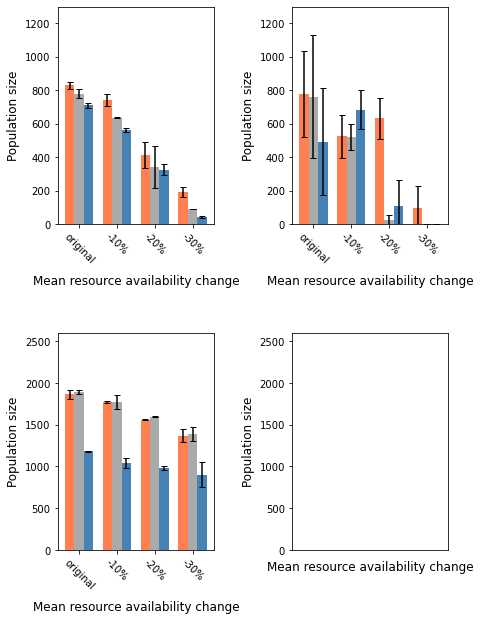

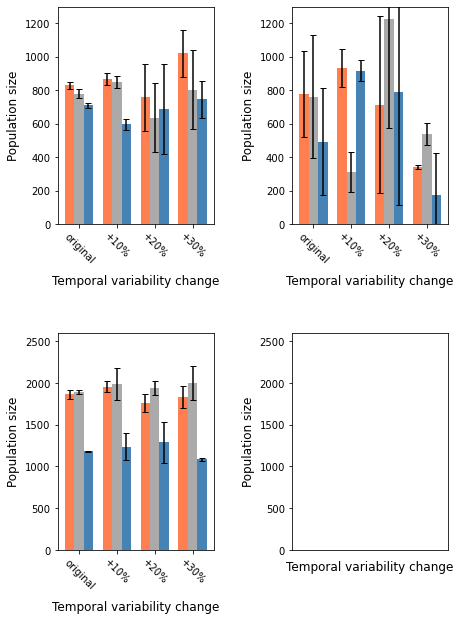

In [3]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s_time = time.time()

data_path = "data/env_change/org"
plt.rcParams["pdf.fonttype"] = 42

result_path = "results/env_change"
if not os.path.isdir(f"{result_path}/mean_res_decline"):
    os.makedirs(f"{result_path}/mean_res_decline")
if not os.path.isdir(f"{result_path}/temporal_var_increase"):
    os.makedirs(f"{result_path}/temporal_var_increase")
    
# Mean resource availability decline
para_sets = ["0701mx00", "0704mx00", "1301mx00", "1307mx00"]

plt.figure(figsize=(7, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, para_set in enumerate(para_sets):
    plt.subplot(2, 2, i+1)
    df = pd.read_csv(f"{data_path}/cao_pfs_{para_set}.csv")
    x = np.arange(df.shape[0])
    plt.bar(x-0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="coral", label="Social populations (CA)")
    df = pd.read_csv(f"{data_path}/nso_pfs_{para_set}.csv")
    plt.bar(x, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="#AAAAAA", label="Nonsocial populations")
    df = pd.read_csv(f"{data_path}/rdo_pfs_{para_set}.csv")
    plt.bar(x+0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="steelBlue", label="Social populations (RD)")
    if i < 2:
        plt.ylim(0, 1300)
    else:
        plt.ylim(0, 2600)
    plt.ylabel("Population size", fontsize=12, labelpad=5)
    plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"], rotation=-45)
    plt.xlabel("Mean resource availability change", fontsize=12, labelpad=10)
    #plt.legend()
plt.savefig(f"{result_path}/mean_res_decline/pop_size_mean_res_decline.pdf", format="pdf", bbox_inches="tight")


# Temporal variations of resource availability increase
para_sets = ["070100px", "070400px", "130100px", "130700px"]    

plt.figure(figsize=(7, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, para_set in enumerate(para_sets):
    plt.subplot(2, 2, i+1)
    df = pd.read_csv(f"{data_path}/cao_pfs_{para_set}.csv")
    x = np.arange(df.shape[0])
    plt.bar(x-0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="coral", label="Social populations (CA)")
    df = pd.read_csv(f"{data_path}/nso_pfs_{para_set}.csv")
    plt.bar(x, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="#AAAAAA", label="Nonsocial populations")
    df = pd.read_csv(f"{data_path}/rdo_pfs_{para_set}.csv")
    plt.bar(x+0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="steelBlue", label="Social populations (RD)")
    if i < 2:
        plt.ylim(0, 1300)
    else:
        plt.ylim(0, 2600)
    plt.ylabel("Population size", fontsize=12, labelpad=5)
    plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"], rotation=-45)
    plt.xlabel("Temporal variability change", fontsize=12, labelpad=10)
    #plt.legend()
plt.savefig(f"{result_path}/temporal_var_increase/pop_size_temporal_var_increase.pdf", format="pdf", bbox_inches="tight")

e_time = time.time()
print(f"Consumed time: {(e_time-s_time):.3f}s")

0.457763671875


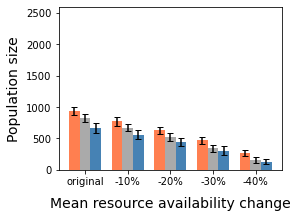

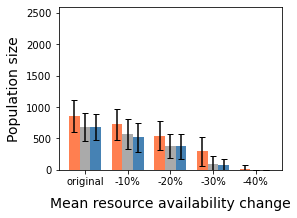

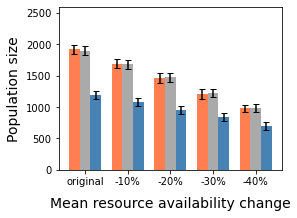

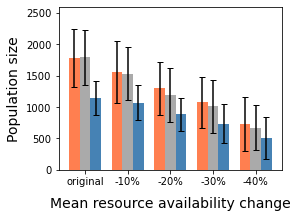

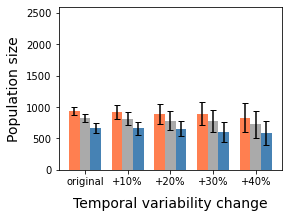

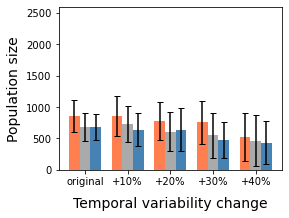

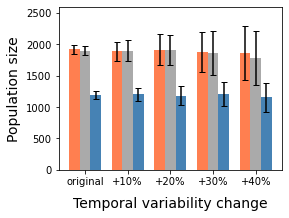

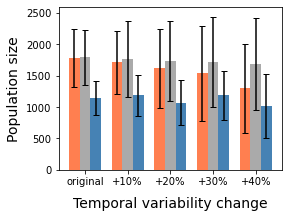

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s_time = time.time()

scenarios = ["0701mx00", "0704mx00", "1301mx00", "1307mx00", "070100px", "070400px", "130100px", "130700px"]

for scenario in scenarios:
    plt.figure(figsize=(4, 3))
    df = pd.read_csv("cao_pfs_"+scenario+".csv")
    x = np.arange(df.shape[0])
    plt.bar(x-0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="coral", label="Social populations (CA)")
    df = pd.read_csv("nso_pfs_"+scenario+".csv")
    plt.bar(x, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="#AAAAAA", label="Nonsocial populations")
    df = pd.read_csv("rdo_pfs_"+scenario+".csv")
    plt.bar(x+0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="steelBlue", label="Social populations (RD)")
    plt.ylim(0, 2600)
    plt.ylabel("Population size", fontsize=14, labelpad=5)
    if "m" in scenario:
        plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"])
        plt.xlabel("Mean resource availability change", fontsize=14, labelpad=10)
    elif "p" in scenario:
        plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"])
        plt.xlabel("Temporal variability change", fontsize=14, labelpad=10)
    #plt.legend()
    #plt.savefig(f"pop_size_{scenario}.pdf", format="pdf")

e_time = time.time()
print(e_time-s_time)

2.334301471710205


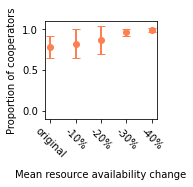

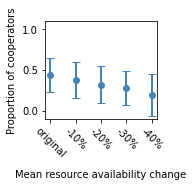

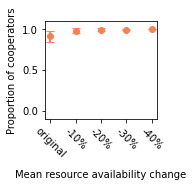

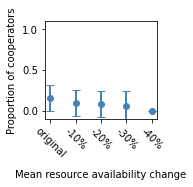

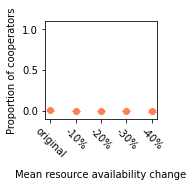

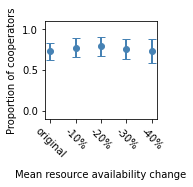

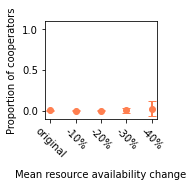

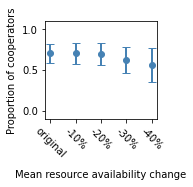

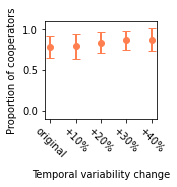

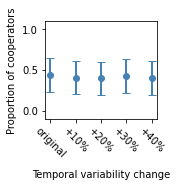

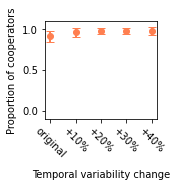

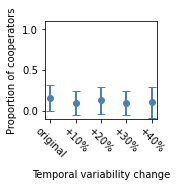

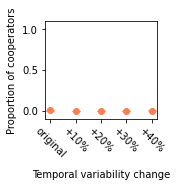

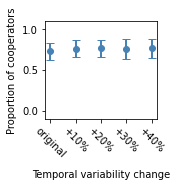

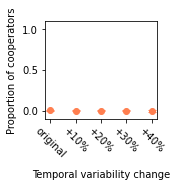

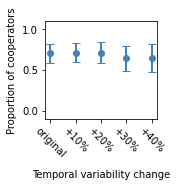

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s_time = time.time()

scenarios = ["0701mx00", "0704mx00", "1301mx00", "1307mx00", "070100px", "070400px", "130100px", "130700px"]

plt.rcParams['pdf.fonttype'] = 42
for scenario in scenarios:
    df = pd.read_csv(f"cao_pfs_{scenario}.csv")
    x = np.arange(df.shape[0])
    plt.figure(figsize=(2, 1.8))
    plt.errorbar(x, df.coop_prop_mean, yerr=df.coop_prop_sd, fmt='o', elinewidth=2, capsize=4, color="coral")
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Proportion of cooperators", fontsize=10, labelpad=5)
    if "m" in scenario:
        plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"], rotation=-45)
        plt.xlabel("Mean resource availability change", fontsize=10, labelpad=10)
    elif "p" in scenario:
        plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"], rotation=-45)
        plt.xlabel("Temporal variability change", fontsize=10, labelpad=10)
    plt.savefig(f"ca_coop_prop_{scenario}.pdf", format="pdf")
    
    df = pd.read_csv(f"rdo_pfs_{scenario}.csv")
    x = np.arange(df.shape[0])
    plt.figure(figsize=(2, 1.8))
    plt.errorbar(x, df.coop_prop_mean, yerr=df.coop_prop_sd, fmt='o', elinewidth=2, capsize=4, color="steelBlue")
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Proportion of cooperators", fontsize=10, labelpad=5)
    if "m" in scenario:
        plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"], rotation=-45)
        plt.xlabel("Mean resource availability change", fontsize=10, labelpad=10)
    elif "p" in scenario:
        plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"], rotation=-45)
        plt.xlabel("Temporal variability change", fontsize=10, labelpad=10)
    plt.savefig(f"rd_coop_prop_{scenario}.pdf", format="pdf")

e_time = time.time()
print(e_time-s_time)